### in this notebook we'll learn how to use transfer learning 

In [309]:
import torch
from torchvision import transforms, models
import numpy as np
import matplotlib.pyplot as plt
import cv2

### let's load a pretrained model

In [310]:
mobilenetv3 = models.mobilenet_v3_small(pretrained=True)

In [311]:
mobilenetv3

MobileNetV3(
  (features): Sequential(
    (0): ConvNormActivation(
      (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
      (2): Hardswish()
    )
    (1): InvertedResidual(
      (block): Sequential(
        (0): ConvNormActivation(
          (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), groups=16, bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
        )
        (1): SqueezeExcitation(
          (avgpool): AdaptiveAvgPool2d(output_size=1)
          (fc1): Conv2d(16, 8, kernel_size=(1, 1), stride=(1, 1))
          (fc2): Conv2d(8, 16, kernel_size=(1, 1), stride=(1, 1))
          (activation): ReLU()
          (scale_activation): Hardsigmoid()
        )
        (2): ConvNormActivation(
          (0): Conv2d(16, 16, kernel_size=(1, 1), stride

### let's test the model with some images 

In [312]:
from torchvision import transforms

In [313]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Resize([224, 224]),
                               transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])])

In [314]:
img = cv2.imread('padlock.jpeg')

In [315]:
img

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

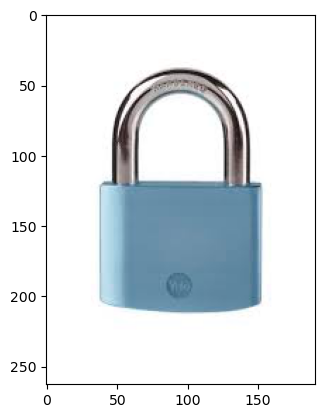

In [316]:
plt.imshow(img)

In [317]:
img.shape

(263, 191, 3)

In [318]:
img_transformed = transform(img)

In [319]:
img_transformed

tensor([[[2.2489, 2.2489, 2.2489,  ..., 2.2489, 2.2489, 2.2489],
         [2.2489, 2.2489, 2.2489,  ..., 2.2489, 2.2489, 2.2489],
         [2.2489, 2.2489, 2.2489,  ..., 2.2489, 2.2489, 2.2489],
         ...,
         [2.2489, 2.2489, 2.2489,  ..., 2.2489, 2.2489, 2.2489],
         [2.2489, 2.2489, 2.2489,  ..., 2.2489, 2.2489, 2.2489],
         [2.2489, 2.2489, 2.2489,  ..., 2.2489, 2.2489, 2.2489]],

        [[2.4286, 2.4286, 2.4286,  ..., 2.4286, 2.4286, 2.4286],
         [2.4286, 2.4286, 2.4286,  ..., 2.4286, 2.4286, 2.4286],
         [2.4286, 2.4286, 2.4286,  ..., 2.4286, 2.4286, 2.4286],
         ...,
         [2.4286, 2.4286, 2.4286,  ..., 2.4286, 2.4286, 2.4286],
         [2.4286, 2.4286, 2.4286,  ..., 2.4286, 2.4286, 2.4286],
         [2.4286, 2.4286, 2.4286,  ..., 2.4286, 2.4286, 2.4286]],

        [[2.6400, 2.6400, 2.6400,  ..., 2.6400, 2.6400, 2.6400],
         [2.6400, 2.6400, 2.6400,  ..., 2.6400, 2.6400, 2.6400],
         [2.6400, 2.6400, 2.6400,  ..., 2.6400, 2.6400, 2.

In [320]:
img_transformed = img_transformed.unsqueeze(0)

In [321]:
img_transformed.shape

torch.Size([1, 3, 224, 224])

In [322]:
mobilenetv3.eval()
pred = mobilenetv3(img_transformed)

In [323]:
toppred = torch.topk(pred, 5).indices
toppred

tensor([[695, 507, 804, 626, 600]])

In [324]:
from labels import labels

#### top predictions 

In [325]:
predictions = [labels[p.item()] for p in toppred[0]]
predictions

['padlock',
 'combination lock',
 'soap dispenser',
 'lighter, light, igniter, ignitor',
 'hook, claw']

#### create a function that takes in an image location and outputs the top 5 predictions 

In [326]:
def predfunc(imgpath):
    plt.figure(figsize=(10,7))
    img = cv2.imread(imgpath)
    imgrgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Resize([224, 224]),
                               transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])])
    img_transformed = transform(img).unsqueeze(0)
    
    mobilenetv3.eval()
    pred = mobilenetv3(img_transformed)
    toppred = torch.topk(pred, 5).indices
    predictions = [labels[p.item()] for p in toppred[0]]
    plt.imshow(imgrgb)
    print('top predictions: ', predictions)

top predictions:  ['parachute, chute', 'umbrella', 'stretcher', 'mountain tent', 'envelope']


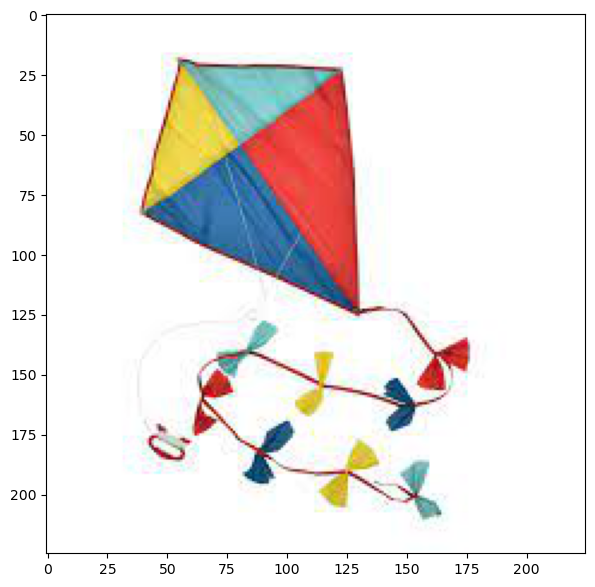

In [327]:
predfunc('kite.jpeg')

top predictions:  ['padlock', 'combination lock', 'soap dispenser', 'lighter, light, igniter, ignitor', 'hook, claw']


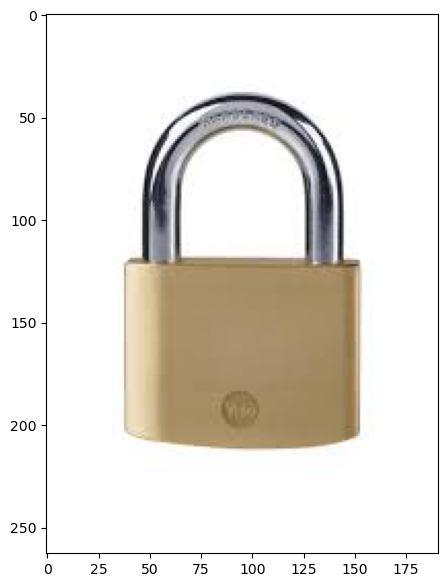

In [328]:
predfunc('padlock.jpeg')

top predictions:  ['grand piano, grand', 'hand-held computer, hand-held microcomputer', 'vacuum, vacuum cleaner', 'chime, bell, gong', 'bassinet']


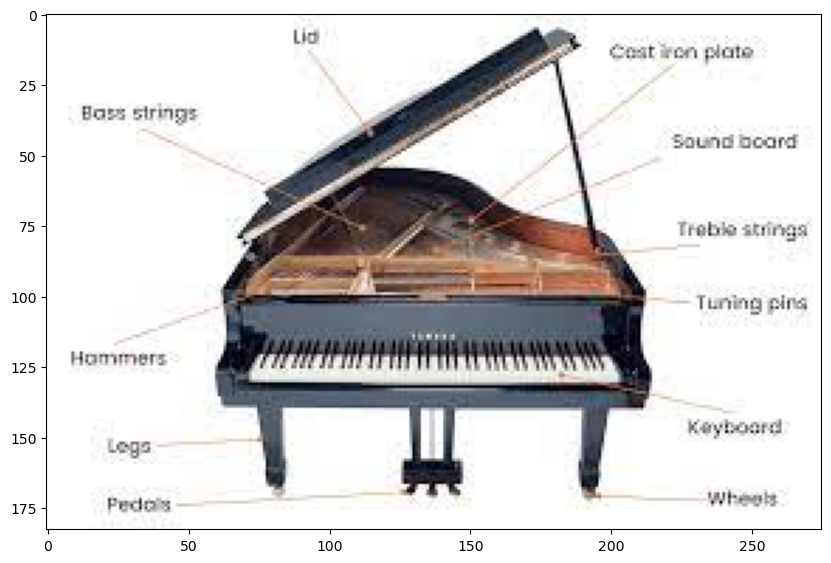

In [329]:
predfunc('piano.jpeg')

top predictions:  ['tusker', 'triceratops', 'African elephant, Loxodonta africana', 'Indian elephant, Elephas maximus', 'common iguana, iguana, Iguana iguana']


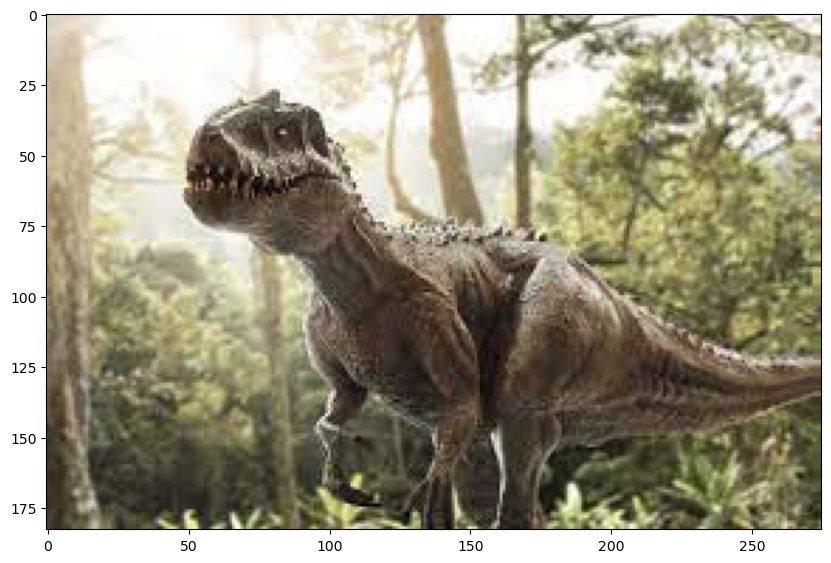

In [330]:
predfunc('dinosaur.jpeg')

Note: 't rex' or 'dinosaur' are not among the 1000 labels. but it is interesting to see that the model finds labels that are similar to a dinosaur 

## Finally, let's start with the transfer learning 

### Freeze the layers in the model 

In [331]:
for param in mobilenetv3.parameters():
    param.requires_grad = False

In [332]:
mobilenetv3.parameters

<bound method Module.parameters of MobileNetV3(
  (features): Sequential(
    (0): ConvNormActivation(
      (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
      (2): Hardswish()
    )
    (1): InvertedResidual(
      (block): Sequential(
        (0): ConvNormActivation(
          (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), groups=16, bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
        )
        (1): SqueezeExcitation(
          (avgpool): AdaptiveAvgPool2d(output_size=1)
          (fc1): Conv2d(16, 8, kernel_size=(1, 1), stride=(1, 1))
          (fc2): Conv2d(8, 16, kernel_size=(1, 1), stride=(1, 1))
          (activation): ReLU()
          (scale_activation): Hardsigmoid()
        )
        (2): ConvNormActivation(
          (0): Conv2d

In [333]:
import torch.nn as nn

#### let's try to select the last layer 

In [334]:
mobilenetv3.classifier

Sequential(
  (0): Linear(in_features=576, out_features=1024, bias=True)
  (1): Hardswish()
  (2): Dropout(p=0.2, inplace=True)
  (3): Linear(in_features=1024, out_features=1000, bias=True)
)

In [335]:
mobilenetv3.classifier[3]

Linear(in_features=1024, out_features=1000, bias=True)

get the number of input features to the last layer

In [336]:
in_feat = mobilenetv3.classifier[3].in_features
in_feat

1024

now replace the final layer in classifier to a layer with 512 input neurons and 2 outputs

In [337]:
mobilenetv3.classifier[3] = nn.Linear(in_features=in_feat, out_features=151, bias=True)

let's check the classifer layer now

In [338]:
mobilenetv3.classifier

Sequential(
  (0): Linear(in_features=576, out_features=1024, bias=True)
  (1): Hardswish()
  (2): Dropout(p=0.2, inplace=True)
  (3): Linear(in_features=1024, out_features=151, bias=True)
)

yup. we modified the last layer to have two outputs, instead of 1000

### prepare the data 

dataset [kaggle link](https://www.kaggle.com/sharansmenon/animals141)

In [339]:
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import Dataset, DataLoader, random_split

In [340]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Resize([224, 224]),
                               transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])])

Note that this dataset folder is not divided into train and test folders. there's just one folder with all the classes

In [341]:
dataset = ImageFolder(root='dataset/', transform=transform)

In [342]:
len(dataset)

6270

In [343]:
type(dataset)

torchvision.datasets.folder.ImageFolder

split the data into train and test sets

In [344]:
trainlen = int(0.8 * len(dataset))
testlen = int(len(dataset)) - trainlen

In [345]:
torch.manual_seed(0)
traindataset, testdataset = random_split(dataset, [trainlen, testlen])

In [346]:
len(traindataset)

5016

In [347]:
len(testdataset)

1254

In [348]:
traindataset.classes

AttributeError: 

hmm.. that didnt work

In [349]:
dataset.classes

['acinonyx-jubatus',
 'aethia-cristatella',
 'agalychnis-callidryas',
 'agkistrodon-contortrix',
 'ailuropoda-melanoleuca',
 'ailurus-fulgens',
 'alces-alces',
 'anas-platyrhynchos',
 'ankylosaurus-magniventris',
 'apis-mellifera',
 'aptenodytes-forsteri',
 'aquila-chrysaetos',
 'ara-macao',
 'architeuthis-dux',
 'ardea-herodias',
 'balaenoptera-musculus',
 'betta-splendens',
 'bison-bison',
 'bos-gaurus',
 'bos-taurus',
 'bradypus-variegatus',
 'branta-canadensis',
 'canis-lupus',
 'canis-lupus-familiaris',
 'carcharodon-carcharias',
 'cardinalis-cardinalis',
 'cathartes-aura',
 'centrochelys-sulcata',
 'centruroides-vittatus',
 'ceratitis-capitata',
 'ceratotherium-simum',
 'chelonia-mydas',
 'chrysemys-picta',
 'circus-hudsonius',
 'codium-fragile',
 'coelacanthiformes',
 'colaptes-auratus',
 'connochaetes-gnou',
 'correlophus-ciliatus',
 'crocodylus-niloticus',
 'crotalus-atrox',
 'crotophaga-sulcirostris',
 'cryptoprocta-ferox',
 'cyanocitta-cristata',
 'danaus-plexippus',
 'dasyp

but we can see the classes in dataset. let's see if we can use traindataset, and if random_splitting an ImageFolder object is allowed

#### lets run some tests

In [350]:
len(traindataset.dataset.classes)

151

In [351]:
len(testdataset.dataset.classes)

151

hm.. calling .dataset on the split datasets (traindataset and testdataset) seem to work

okay, let's try to use this to train

### train the model 

In [352]:
from torch import optim
from torch.optim import lr_scheduler

In [353]:
epochs = 10
batch_size = 50

In [354]:
mobilenetv3.classifier[3].requires_grad_(True)

Linear(in_features=1024, out_features=151, bias=True)

In [355]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(mobilenetv3.classifier[3].parameters())
# decay learning rate by a factor of 0.1 every 5 epochs. (logic for lr taken from the udemy pytorch course)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [356]:
trainloader = DataLoader(traindataset, batch_size, shuffle=True)

In [357]:
print_every = 50
running_loss = []

for e in range(epochs):
    exp_lr_scheduler.step()
    for i, (image, label) in enumerate(trainloader):
        optimizer.zero_grad()
        output = mobilenetv3(image)
        loss = criterion(output, label)
        loss.backward()
        optimizer.step()
        
        running_loss.append(loss.item())
        if i%print_every == 0:
            print(f'epoch: {e}, iteration: {i}, loss: {loss.item()}')

/home/amoel/anaconda3/envs/udacitycvenv/lib/python3.9/site-packages/torch/optim/lr_scheduler.py:129: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


epoch: 0, iteration: 0, loss: 5.086161136627197
epoch: 0, iteration: 50, loss: 2.005687952041626
epoch: 0, iteration: 100, loss: 1.185638189315796
epoch: 1, iteration: 0, loss: 0.8767348527908325
epoch: 1, iteration: 50, loss: 0.4701507091522217
epoch: 1, iteration: 100, loss: 0.42510396242141724
epoch: 2, iteration: 0, loss: 0.33364054560661316
epoch: 2, iteration: 50, loss: 0.357807457447052
epoch: 2, iteration: 100, loss: 0.38250845670700073
epoch: 3, iteration: 0, loss: 0.18706269562244415
epoch: 3, iteration: 50, loss: 0.2111353874206543
epoch: 3, iteration: 100, loss: 0.4495188593864441
epoch: 4, iteration: 0, loss: 0.12301307916641235
epoch: 4, iteration: 50, loss: 0.16826976835727692
epoch: 4, iteration: 100, loss: 0.06610450148582458
epoch: 5, iteration: 0, loss: 0.08407408744096756
epoch: 5, iteration: 50, loss: 0.0968906432390213
epoch: 5, iteration: 100, loss: 0.09105236828327179
epoch: 6, iteration: 0, loss: 0.05253032594919205
epoch: 6, iteration: 50, loss: 0.064308218657

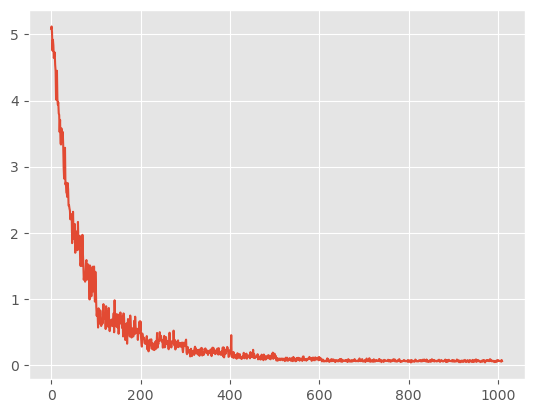

In [358]:
plt.style.use('ggplot')
plt.plot(np.arange(len(running_loss)), running_loss)

Great! it is learning, and seems to be learning rather well!

### test the accuracy

Now comes a tricky part. if we use normalization in the transform for the test images, the dataloader will return an image with weird colors (example in the cell below) because the normalization uses the average mean and standard deviation, which is not the same for all the images. but we still want to normalize, because it increases the accuracy. the test acc for this mode with normalization = 0.8429027113237639 and without normalization = 0.8006379585326954. after testing, i've decided to keep the normalization on, and plot the off-color images

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


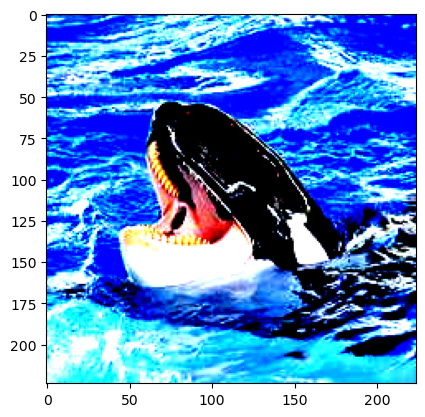

In [402]:
#with norm
sampleimagereshaped = np.transpose(sampleimage[0], (1,2,0))
plt.style.use('default')
plt.imshow(sampleimagereshaped)

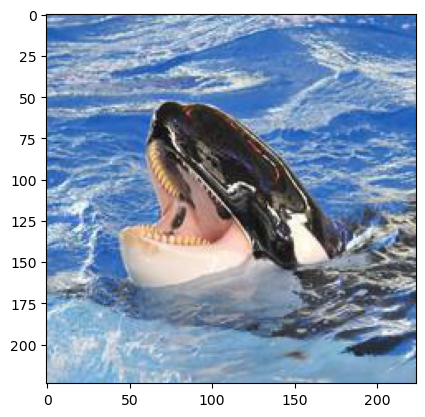

In [423]:
# without norm
sampleimagereshaped = np.transpose(sampleimage[0], (1,2,0))
plt.style.use('default')
plt.imshow(sampleimagereshaped)

let's reassign the transform to exclude normalization, or the colors in the images would look weirdly off 

In [403]:
# try without normalization. we'll plot images with better colors, but the model will perform worse
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Resize([224, 224])])

In [424]:
# the images will look worse after normalization, but the model will perform much better
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Resize([224, 224]),
                               transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])])

In [425]:
dataset = ImageFolder(root='dataset/', transform=transform)

In [426]:
torch.manual_seed(0)
traindataset, testdataset = random_split(dataset, [trainlen, testlen])

In [427]:
testloader = DataLoader(testdataset, 1, False)

let's test one image first

In [428]:
mobilenetv3.eval()
sampleimage, samplelabel = next(iter(testloader))

In [429]:
sampleimage

tensor([[[[-0.5596, -0.3712, -0.3883,  ..., -1.4843, -1.3302, -1.3644],
          [-0.5424, -0.5938, -0.5424,  ..., -1.3302, -1.2788, -1.3644],
          [-0.1828, -0.4739, -0.3198,  ..., -1.1418, -1.1075, -1.2788],
          ...,
          [ 0.8104,  0.8789,  0.8789,  ...,  0.1597,  0.1426,  0.1083],
          [ 0.9303,  0.9132,  0.8104,  ...,  0.1597,  0.1426,  0.1083],
          [ 1.1529,  0.9646,  0.7077,  ...,  0.1597,  0.1426,  0.1083]],

         [[ 0.1527,  0.3452,  0.3277,  ..., -0.2850, -0.0574, -0.0224],
          [ 0.1527,  0.1001,  0.1352,  ..., -0.1625, -0.0049, -0.0574],
          [ 0.4503,  0.1527,  0.3102,  ..., -0.0049,  0.1001,  0.0126],
          ...,
          [ 1.3606,  1.4307,  1.4832,  ...,  0.8354,  0.8354,  0.8004],
          [ 1.4832,  1.4657,  1.4132,  ...,  0.8529,  0.8004,  0.7654],
          [ 1.7108,  1.5707,  1.3431,  ...,  0.8179,  0.8004,  0.7654]],

         [[ 1.2108,  1.4025,  1.3851,  ...,  1.3328,  1.5420,  1.5594],
          [ 1.1585,  1.1062,  

In [430]:
sampleimage.shape

torch.Size([1, 3, 224, 224])

In [431]:
samplepred = mobilenetv3(sampleimage)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


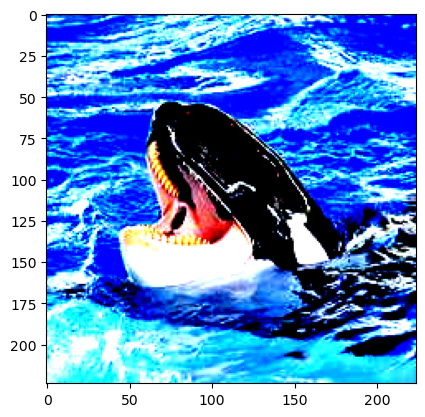

In [432]:
sampleimagereshaped = np.transpose(sampleimage[0], (1,2,0))
plt.style.use('default')
plt.imshow(sampleimagereshaped)

In [433]:
samplepred.argmax(1)

tensor([98])

In [434]:
samplelabel

tensor([98])

In [435]:
samplepred_scientific_name = testdataset.dataset.classes[samplepred.argmax(1).item()]
samplepred_scientific_name

'orcinus-orca'

let's load the json file to translate the scientific name to the common name

In [436]:
import json

In [437]:
with open('translation.json') as json_file:
    translation = json.load(json_file)

In [438]:
samplepred_common_name = translation[samplepred_scientific_name]
samplepred_common_name

'Killer Whale'

#### run the model on all the test images 

In [439]:
mobilenetv3.eval()
running_pred = []
running_label = []
running_correct = []
for image, label in testloader:
    output = mobilenetv3(image)
    maxout = torch.argmax(output, 1)
    running_label.append(label.item())
    running_pred.append(maxout.item())
    running_correct.append(1 if maxout.item() == label.item() else 0)

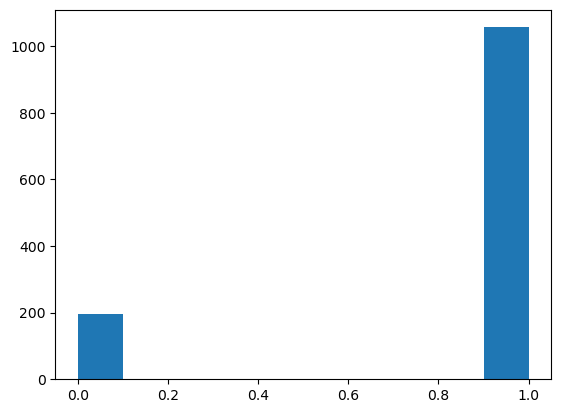

In [440]:
plt.hist(running_correct)
plt.show()

In [441]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

<AxesSubplot:>

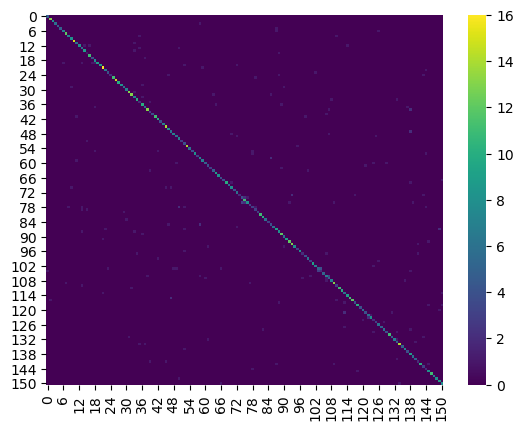

In [442]:
confmat = confusion_matrix(running_label, running_pred)
sns.heatmap(confmat, cmap='viridis') # okay there are way too many labels

In [443]:
accuracy_score(running_label, running_pred)

0.8429027113237639

not bad! we got quite a high accuracy

#### put everything in a function so that we can see the prediction and correct label with the image 

In [444]:
testloader = DataLoader(testdataset, 5, shuffle=True)

In [452]:
def testpred():
    mobilenetv3.eval()
    plt.figure(figsize=(20,20))
    testloader = DataLoader(testdataset, 5, shuffle=True)
    data = next(iter(testloader))
    for i,(testimage, testlabel) in enumerate(zip(data[0],data[1])):
        testimage.unsqueeze_(0)
        testimage_t = np.transpose(testimage[0], (1,2,0))
        
        pred = mobilenetv3(testimage)
        truename = testdataset.dataset.classes[testlabel.item()]
        predsciname = testdataset.dataset.classes[pred.argmax(1).item()]
        predcommonname = translation[predsciname]
#         print(testimage_t)
        plt.subplot(5,1,i+1)
        plt.imshow(testimage_t.detach())
#         plt.axis('off')
        plt.xlabel(f'true_sciname: {truename} \npred_sciname: {predsciname}, \npred_common_name: {predcommonname}')
        plt.tight_layout()
#         print(sciname)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


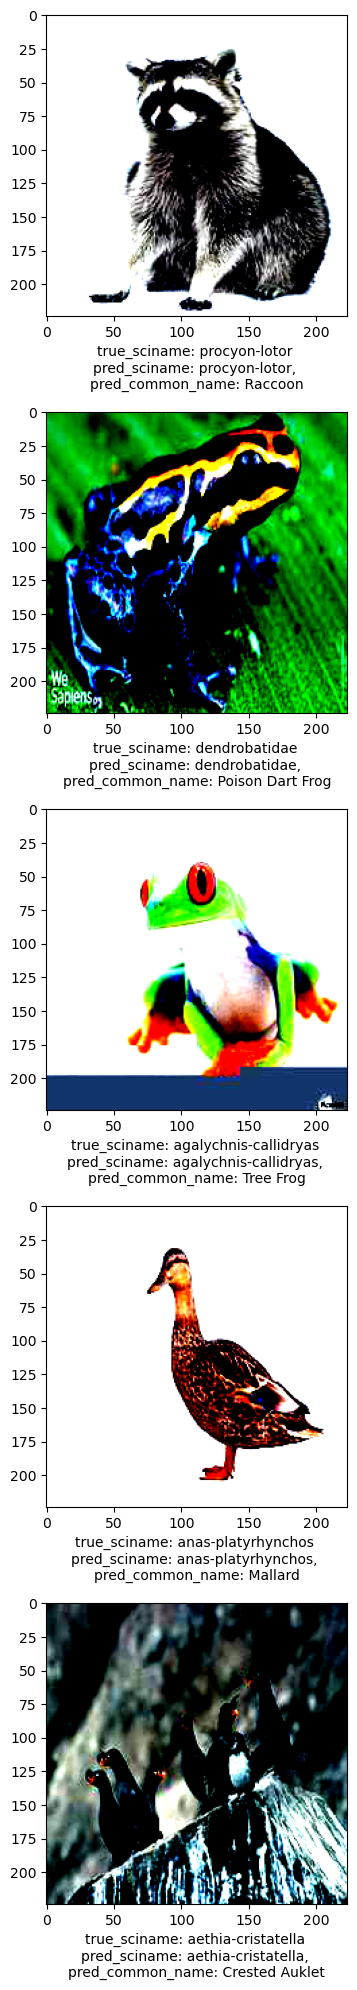

In [453]:
testpred()

the images look off color because normalization passes an average mean and std dev of all images and not the accurate mean and std dev of each image

#### but at least the model performs well with relatively little training and data! and remember that we only trained the last layer

### now let's test some images taken from google

In [465]:
def predplot(imgpath):
    plt.figure(figsize=(10,7))
    img = cv2.imread(imgpath)
    imgrgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Resize([224, 224]),
                               transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])])
    img_transformed = transform(img).unsqueeze(0)
    
    mobilenetv3.eval()
    pred = mobilenetv3(img_transformed)
    predsciname = dataset.classes[pred.argmax(1).item()]
    predcommonname = translation[predsciname]

    plt.imshow(imgrgb)
    plt.xlabel(f'pred_sciname: {predsciname}, \npred_common_name: {predcommonname}')
    plt.tight_layout()

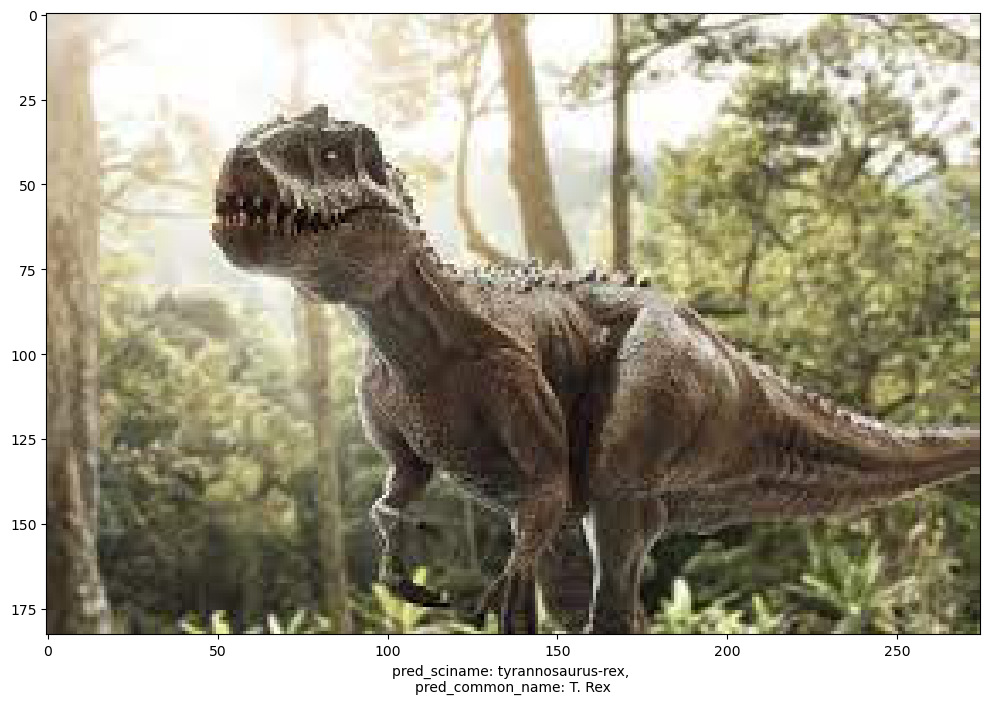

In [466]:
predplot('dinosaur.jpeg')

nice! let's test a few more

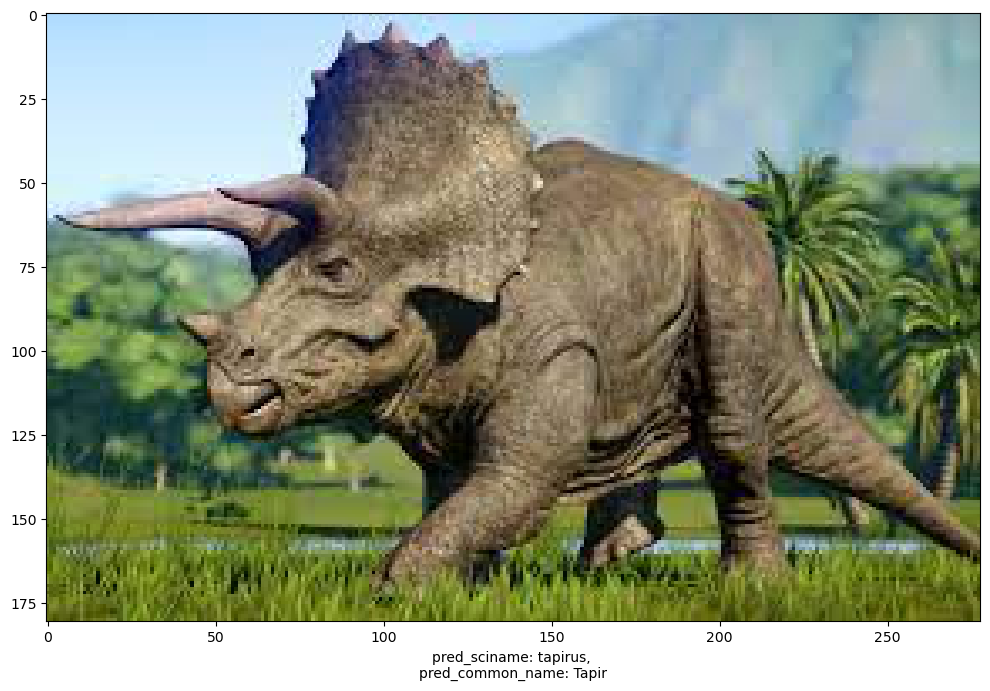

In [467]:
predplot('triceratops.jpeg')

whoops. that didnt predict correctly. next one!

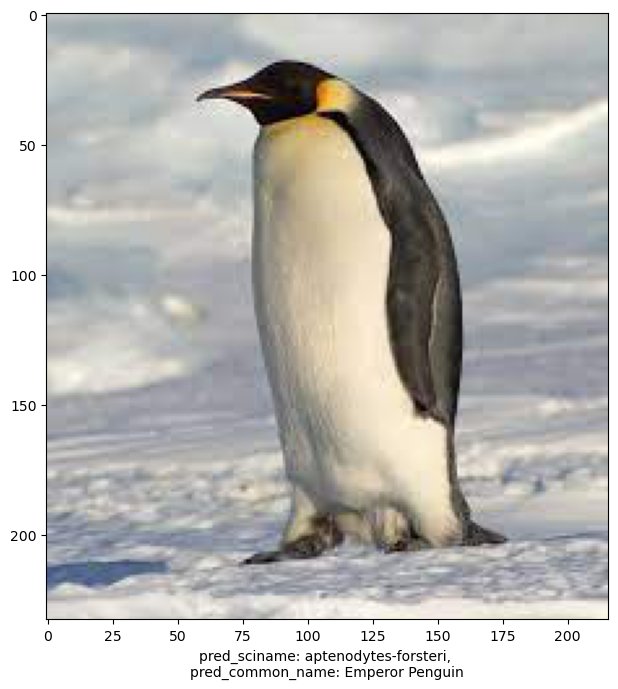

In [468]:
predplot('penguin.jpeg')

Correct! 

### conclusion 

we used transfer learning with mobilenet, and used the new model to train an image classifier for 151 species of animals